In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [61]:
df = pd.read_csv("./churn.csv")

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

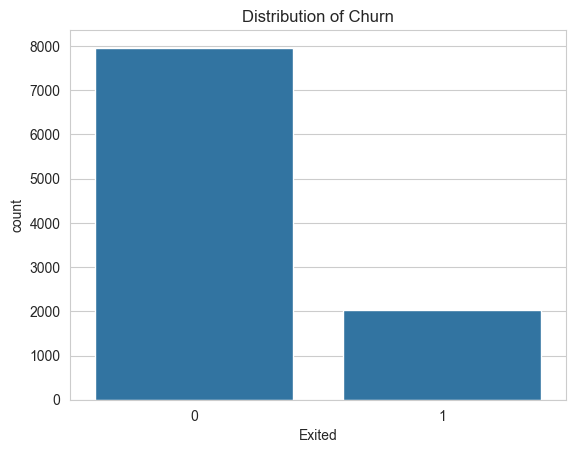

In [65]:
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")

Text(0.5, 1.0, 'Age Distribution')

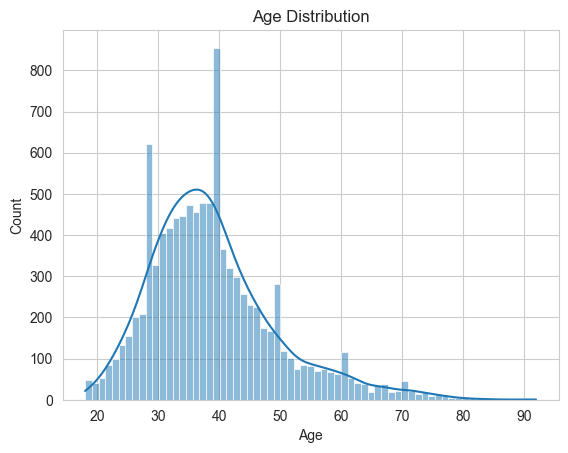

In [66]:
sns.histplot(x="Age", data=df, kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs. Age')

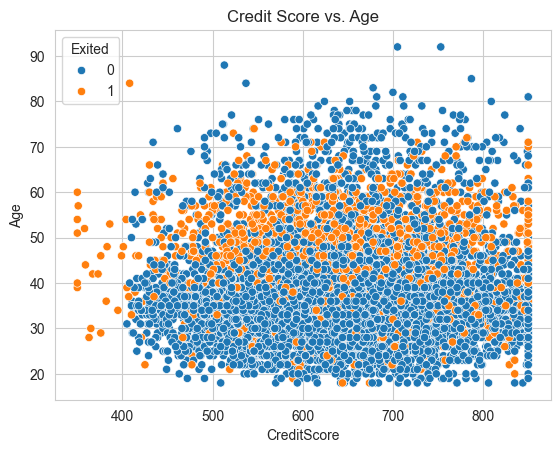

In [67]:
sns.scatterplot(x="CreditScore", y="Age", data=df, hue="Exited")
plt.title("Credit Score vs. Age")

Text(0.5, 1.0, 'Balance vs. Churn')

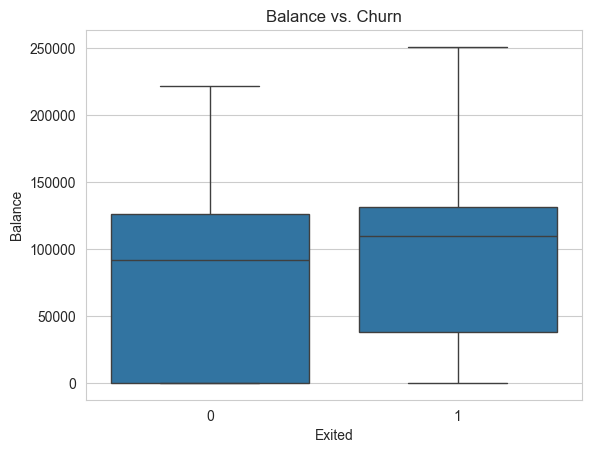

In [68]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs. Churn")

Text(0.5, 1.0, 'Credit Score vs. Churn')

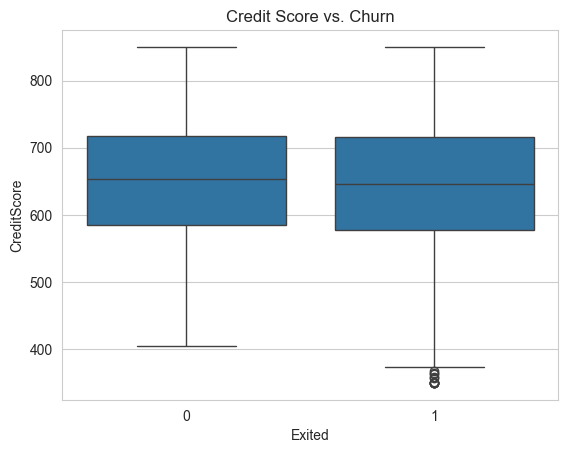

In [69]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score vs. Churn")

In [70]:
features = df.drop('Exited', axis=1)

In [71]:
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [72]:
target = df['Exited']
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [73]:
features.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [74]:
features = features.dropna()
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [75]:
features = pd.get_dummies(features, columns=['Geography', 'Gender'])

In [76]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [78]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [80]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr_model = LogisticRegression(random_state=42)


In [83]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [84]:
lr_predictions = lr_model.predict(X_test)

In [85]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [87]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [88]:
lr_accuracy

0.811

In [89]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [90]:
def  evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

  with open(filename, 'wb') as file:
    pickle.dump(model, file)
  print(f"Model saved as {filename}")
  print("-----------------------------------")

#

In [91]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")


XGBClassifier Accuracy: 0.7455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

Model saved as xgb_model.pkl
-----------------------------------
DecisionTreeClassifier Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

Model saved as dt_model.pkl
-----------------------------------
RandomForestClassifier Accuracy: 0.8645

Classification Report:
              precision    recall 

In [92]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

In [93]:
feature_importance

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194035, 0.16414644, 0.03265523, 0.04646329, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [94]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [95]:
feature_immportance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

In [96]:
feature_immportance_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [97]:
feature_immportance_df = feature_immportance_df.sort_values(by='importance', ascending=False)
feature_immportance_df

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


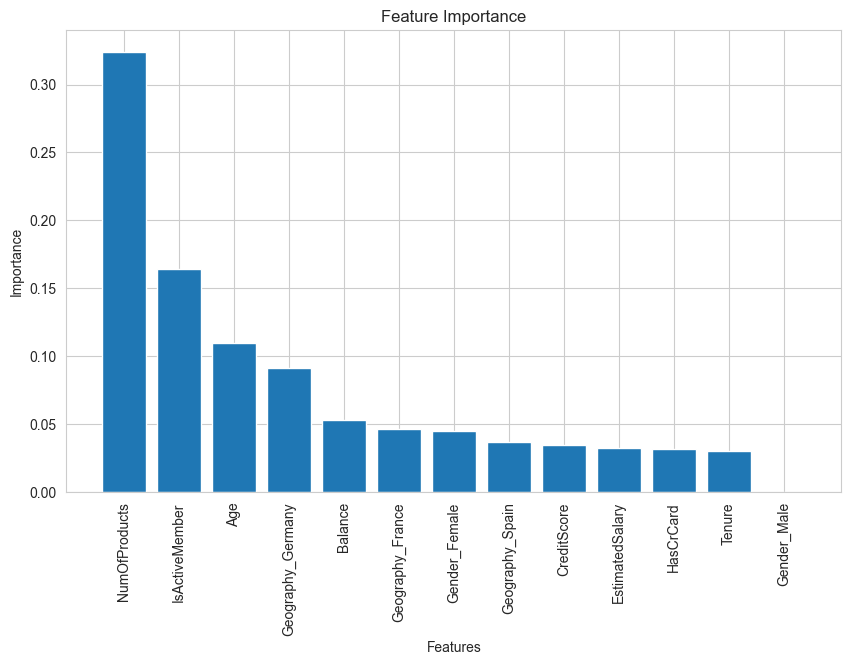

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(feature_immportance_df['feature'], feature_immportance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [99]:
features


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [100]:
features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

In [101]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [102]:
features['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

In [103]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Adult
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Adult
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Adult
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Adult
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Adult
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Adult
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Adult
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Adult


In [104]:
features['TenureAgeRatio'] = df['Tenure'] / df['Age']
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Adult,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Adult,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Adult,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Adult,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Adult,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Adult,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Adult,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Adult,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Adult,0.071429


In [105]:
features = pd.get_dummies(features, drop_first=True)

In [106]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


In [107]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [108]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,True,False,False


In [ ]:
xgboost_mode = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_mode, X_train, X_test, y_train, y_test, "'xgboost-featureEngineered.pkl")


XGBClassifier Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

Model saved as xgboost_featureEngineered.pkl
-----------------------------------


In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [112]:
evaluate_and_save_model(xgboost_mode, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

Model saved as xgboost-SMOTE.pkl
-----------------------------------


In [113]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [114]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(random_state=42, probability=True))
    ],
    voting='soft'
)

In [115]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_classifier.pkl")

VotingClassifier Accuracy: 0.8615

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1607
           1       0.68      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Model saved as voting_classifier.pkl
-----------------------------------


In [116]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(random_state=42, probability=True))
    ],
    voting='hard'
)

In [117]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

VotingClassifier Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Model saved as voting_clf.pkl
-----------------------------------
